In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from scipy import interpolate
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
from pathlib import Path  
style.use('default') or plt.style.use('default')

In [7]:
# This function takes as input the radius from the centre of the ice sheet or ice rise 
# and returns the height at that radius:

L = 5000

def h(R, A, n):
    a_s = 1.2
    rho = 900
    g = 9.81
    h = (2**(n/(2*n + 2))) * ((a_s*(n+2))/(4*A*(rho*g)**n))**(1/(2*n+2)) \
    * L**((n+1)/n) * (1-(R/L)**((n+1)/n))**(n/(2*n+2))
    return h

h0 = h(0, 4.6e-25*1e8, 3)
h0

425888.69663816586

In [8]:
# Calculate the cross-sectional area from divide to edge

# Function to find the area under the curve

def Area(L, A, n):
    Area = 0
    Step = 0.0001 * L
    for r in np.arange(Step, L + Step, Step):
        Area += Step * h(r, A, n)
    return Area


In [9]:
# Bisection method

Area_n3 = Area(L, 4.6e-25*1e8, 3)
a = 4.6e-27
b = 4.6e-25*1e8
c = (a+b)/2
while abs(Area_n3 - Area(L, c, 4)) > 0.000001:
    if Area_n3 - Area(L, c, 4) > 0:
        b = c
    elif Area_n3 - Area(L, c, 4) < 0:
        a = c
    c = (a+b)/2



In [10]:
# Create lists for Vialov elevations

R = list(np.arange(0, L, 0.1))
h_n3 = []
h_n4 = []

for r in R:
    h_n3.append(h(r, 4.6e-25*1e8, 3))
    h_n4.append(h(r, c, 4))


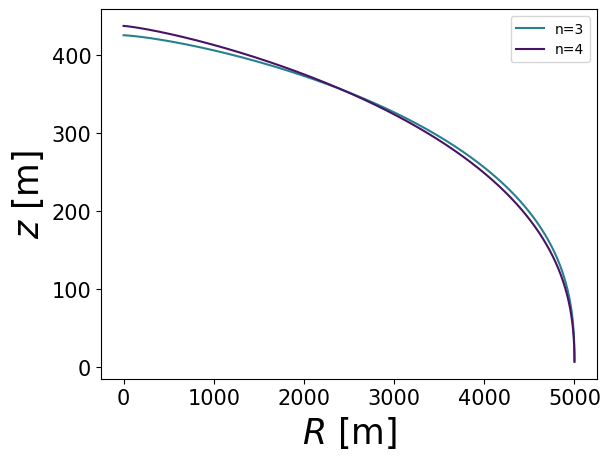

In [20]:

colors = plt.cm.viridis_r(np.linspace(0,0.95,6))
fig, ax = plt.subplots(1, 1)

ax.plot(R, [x / 1000 for x in h_n3], label="n=3", color=colors[3])
ax.plot(R, [x / 1000 for x in h_n4], label="n=4", color=colors[5])
ax.legend()
ax.set_xlabel(r'$R$ [m]', size=25)
ax.set_ylabel(r'$z$ [m]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/VialovComparison.jpg', format='jpg', dpi=700, bbox_inches = "tight")

